<a href="https://colab.research.google.com/github/pratik98/Social-Media-Seminar-19/blob/master/SMBA_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping: Twitter

![alt text](https://musically.com/wp-content/uploads/2019/02/twitter-logo-1200x500.jpg) <center>



__Import packages:__

In [0]:
# this downloads the library GetOldTweets3
!pip install GetOldTweets3

In [0]:
# import the Twitter library
import GetOldTweets3 as got

# import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tracks the running time (execution of code)
import time

# inspects the structure of a class or model
import inspect

__We will use the Library [GetOldTweets3](https://pypi.org/project/GetOldTweets3/).__

## Scraping the tweets

<center>

![alt text](https://cdn.businessinsider.de/wp-content/uploads/2020/01/613a083a8080114f55e9679579bf278c95d838f4-400x300.jpg)

</center>

__Top 10 Tweets:__

In [0]:
# specify the criteria for who or what to scrape
criteria = got.manager.TweetCriteria().setUsername("elonmusk")\
                                               .setTopTweets(True)\
                                               .setMaxTweets(10)\
                                               .setEmoji("unicode")

In [0]:
# get the Tweets for the specified criteria
tweet = got.manager.TweetManager.getTweets(criteria)

__Returns a list of models.__

In [0]:
# returns list of models
tweet

In [0]:
# first Tweet
tweet[0]

In [0]:
type(tweet[0])

GetOldTweets3.models.Tweet.Tweet

In [0]:
# text of the first Tweet
tweet[0].text

'The stars in Starship’s mirrored hull reflected'

__[Did he post that?](https://twitter.com/elonmusk/with_replies?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)__

In [0]:
print("Number of likes he got on that Tweet:", tweet[0].favorites)

Number of likes he got on that Tweet: 20403


### Changing the data type

__Inspecting the first Tweet:__

In [0]:
# inspect the structure of a single Tweet
inspect.getmembers(tweet[0]) 

[('__class__', GetOldTweets3.models.Tweet.Tweet),
 ('__delattr__',
  <method-wrapper '__delattr__' of Tweet object at 0x7f26f7f179e8>),
 ('__dict__',
  {'author_id': 44196397,
   'date': datetime.datetime(2020, 1, 28, 5, 30, tzinfo=datetime.timezone.utc),
   'favorites': 20403,
   'formatted_date': 'Tue Jan 28 05:30:00 +0000 2020',
   'geo': '',
   'hashtags': '',
   'id': '1222029032704892928',
   'mentions': '',
   'permalink': 'https://twitter.com/elonmusk/status/1222029032704892928',
   'replies': 643,
   'retweets': 822,
   'text': 'The stars in Starship’s mirrored hull reflected',
   'to': None,
   'urls': '',
   'username': 'elonmusk'}),
 ('__dir__', <function Tweet.__dir__>),
 ('__doc__', None),
 ('__eq__', <method-wrapper '__eq__' of Tweet object at 0x7f26f7f179e8>),
 ('__format__', <function Tweet.__format__>),
 ('__ge__', <method-wrapper '__ge__' of Tweet object at 0x7f26f7f179e8>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of Tweet object at 0x7f26f7f179e8>

In [0]:
# the information is located in a Dict 
inspect.getmembers(tweet[0])[2][1]

{'author_id': 44196397,
 'date': datetime.datetime(2020, 1, 25, 21, 18, 36, tzinfo=datetime.timezone.utc),
 'favorites': 5594,
 'formatted_date': 'Sat Jan 25 21:18:36 +0000 2020',
 'geo': '',
 'hashtags': '',
 'id': '1221180591762071553',
 'mentions': '',
 'permalink': 'https://twitter.com/elonmusk/status/1221180591762071553',
 'replies': 91,
 'retweets': 89,
 'text': 'Too niche',
 'to': 'spongbob_facts',
 'urls': '',
 'username': 'elonmusk'}

__Turn the `Dict` into a `pd.DataFrame`:__

In [0]:
# turn the Dict into a pd.DataFrame
pd.DataFrame([inspect.getmembers(tweet[0])[2][1]])

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
0,elonmusk,None,The stars in Starship’s mirrored hull reflected,822,20403,643,1222029032704892928,https://twitter.com/elonmusk/status/1222029032...,44196397,2020-01-28 05:30:00+00:00,Tue Jan 28 05:30:00 +0000 2020,,,,


__Extract all the instances from the `Tweet.models`.__

In [0]:
# a loop to turn all 10 Dicts into one pd.DF
df = pd.DataFrame() 

# loops over the list of Tweet models
for i in range(0, len(tweet)):
    df = df.append(pd.DataFrame([inspect.getmembers(tweet[i])[2][1]]))
    df.index = np.arange(len(df))

In [0]:
# (rows, columns)
df.shape

(10, 15)

In [0]:
df

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
0,elonmusk,None,The stars in Starship’s mirrored hull reflected,822,20403,643,1222029032704892928,https://twitter.com/elonmusk/status/1222029032...,44196397,2020-01-28 05:30:00+00:00,Tue Jan 28 05:30:00 +0000 2020,,,,
1,elonmusk,Erdayastronaut,"Parent material strength roughly doubles, so w...",67,1973,88,1221946404131745798,https://twitter.com/elonmusk/status/1221946404...,44196397,2020-01-28 00:01:40+00:00,Tue Jan 28 00:01:40 +0000 2020,,,,
2,elonmusk,None,Starship 9m test tank made 7.5 bar at room tem...,1220,20407,565,1221938474233868288,https://twitter.com/elonmusk/status/1221938474...,44196397,2020-01-27 23:30:09+00:00,Mon Jan 27 23:30:09 +0000 2020,,,,
3,elonmusk,spongbob_facts,Too niche,94,5778,96,1221180591762071553,https://twitter.com/elonmusk/status/1221180591...,44196397,2020-01-25 21:18:36+00:00,Sat Jan 25 21:18:36 +0000 2020,,,,
4,elonmusk,ThingsWork,A Tesla works as a boat for short periods of t...,4763,44239,1223,1221176639339425792,https://twitter.com/elonmusk/status/1221176639...,44196397,2020-01-25 21:02:53+00:00,Sat Jan 25 21:02:53 +0000 2020,,,,"https://m.youtube.com/watch?v=cBYFo6fXPvU,http..."
5,elonmusk,None,Meme necromancy,11639,113858,1064,1221138280059551744,https://twitter.com/elonmusk/status/1221138280...,44196397,2020-01-25 18:30:28+00:00,Sat Jan 25 18:30:28 +0000 2020,,,,
6,elonmusk,elonmusk,Going with nomenclature of Giga [most widely u...,165,2047,263,1220943367753699329,https://twitter.com/elonmusk/status/1220943367...,44196397,2020-01-25 05:35:57+00:00,Sat Jan 25 05:35:57 +0000 2020,,,,
7,elonmusk,IheartTesla,For sure. Giga Berlin will build sustainable e...,220,4113,137,1220942162046541824,https://twitter.com/elonmusk/status/1220942162...,44196397,2020-01-25 05:31:10+00:00,Sat Jan 25 05:31:10 +0000 2020,,,,
8,elonmusk,EvaFoxU,Sounds like we need to clear up a few things! ...,411,6131,180,1220938613862436865,https://twitter.com/elonmusk/status/1220938613...,44196397,2020-01-25 05:17:04+00:00,Sat Jan 25 05:17:04 +0000 2020,,,,
9,elonmusk,Erdayastronaut,V3 Supercharger deployment will accelerate con...,359,6946,345,1220768333097771011,https://twitter.com/elonmusk/status/1220768333...,44196397,2020-01-24 18:00:26+00:00,Fri Jan 24 18:00:26 +0000 2020,,,,


__Scraping the Elon Musk's Tweets from January:__

In [0]:
# the criteria to scrape a time interval
criteria = got.manager.TweetCriteria().setUsername("elonmusk")\
                                               .setSince("2020-01-01")\
                                               .setUntil("2020-01-26")\
                                               .setEmoji("unicode")

In [0]:
# get the Tweets
tweet_jan = got.manager.TweetManager.getTweets(criteria)

In [0]:
# all Tweets from January from Elon Musk
len(tweet_jan)

142

# Scraping Functions

### Scrape tweets for given time interval 

In [0]:
# wrapping all the above code up in a function (for time interval)
def scrape_twitter_time(acc_name, since, until):
    
    tweetCriteria = got.manager.TweetCriteria().setUsername(acc_name)\
                                               .setSince(since)\
                                               .setUntil(until)\
                                               .setEmoji("unicode")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    df = pd.DataFrame() 
    for i in range(0, len(tweets)):
        df = df.append(pd.DataFrame([inspect.getmembers(tweets[i])[2][1]]))
        df.index = np.arange(len(df))

    return(df) # returns a pd.DF

### Function: Scrape tweets for given amount

In [0]:
# wrapping all the above code up in a function (for number of Tweets)
def scrape_twitter_amount(acc_name, number):
    
    tweetCriteria = got.manager.TweetCriteria().setUsername(acc_name)\
                                               .setTopTweets(True)\
                                               .setMaxTweets(number)\
                                               .setEmoji("unicode")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    df = pd.DataFrame() 
    for i in range(0, len(tweets)):
        df = df.append(pd.DataFrame([inspect.getmembers(tweets[i])[2][1]]))
        df.index = np.arange(len(df))

    return(df) # returns a pd.DF

## Scrape Sanders, Trump and Warren

<left>

![alt text](https://media2.giphy.com/media/3o6Ztn7QsncvRY58ty/giphy.gif?cid=790b761135b5a402e69ca14a47a862067bf4106772abbca8&rid=giphy.gif)

</left>

<center>

![alt text](https://media0.giphy.com/media/xTiTnHXbRoaZ1B1Mo8/giphy.gif?cid=790b7611d2fcfdb7b2b0db27bca08af1e9a384e684465816&rid=giphy.gif)

</center>


<div align="right">


![alt text](https://media.giphy.com/media/JmIJ4cTKsUzzPqhqDz/giphy.gif)

</div>

In [0]:
# the number of Tweets we scrape
this_many_tweets = 100

In [0]:
# calling the function from above (number of Tweets) for Trump
start_time = time.time()
trump_number = scrape_twitter_amount("realDonaldTrump", this_many_tweets)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.2930619716644287 seconds ---


In [0]:
# calling the function from above (number of Tweets) for Sanders
start_time = time.time()
sanders_number = scrape_twitter_amount("BernieSanders", this_many_tweets)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.1601762771606445 seconds ---


In [0]:
# calling the function from above (number of Tweets) for Warren
start_time = time.time()
warren_number = scrape_twitter_amount("ewarren", this_many_tweets)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.1269519329071045 seconds ---


In [0]:
# checking whether the right amount of Tweets was scraped
print("Did we scrape the right amount of tweets?")
if len(trump_number) == this_many_tweets:
    print("Yes!")
else:
    print("There seems to be a mistake :(")

Did we scrape the right amount of tweets?
Yes!


### Scrape Trump's January tweets

In [0]:
# scraping Tweets for the month of January
start_time = time.time()
trump_time = scrape_twitter_time("realDonaldTrump", "2020-01-01", "2020-01-25")
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.545911073684692 seconds ---


In [0]:
# number of Tweets from January
len(trump_time)

265

## Data Analysis: What do the tweets tell us?

In [0]:
# the DataFrame's shape 
print("Number of tweets:", sanders_number.shape[0])
print("Number of columns:", sanders_number.shape[1])

Number of tweets: 100
Number of columns: 15


__This is the information we obtain for each tweet:__

In [0]:
# name of all columns in the pd.DataFrame
list(trump_number)

['username',
 'to',
 'text',
 'retweets',
 'favorites',
 'replies',
 'id',
 'permalink',
 'author_id',
 'date',
 'formatted_date',
 'hashtags',
 'mentions',
 'geo',
 'urls']

In [0]:
# the pd.DataFrame with its 15 columns
trump_number.head()

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
0,realDonaldTrump,GrassleyPress,Thank you to Chuck & all. USMCA is going to be...,4433,15843,855,1222009264396558336,https://twitter.com/realDonaldTrump/status/122...,25073877,2020-01-28 04:11:27+00:00,Tue Jan 28 04:11:27 +0000 2020,,,,https://twitter.com/grassleypress/status/12203...
1,realDonaldTrump,SenatorWicker,"Thank you Roger, it is a big Hoax!",5370,21770,1903,1222008772102705152,https://twitter.com/realDonaldTrump/status/122...,25073877,2020-01-28 04:09:29+00:00,Tue Jan 28 04:09:29 +0000 2020,,,,https://twitter.com/senatorwicker/status/12219...
2,realDonaldTrump,None,"On International Holocaust Remembrance Day, we...",18371,71350,6381,1221842613487251458,https://twitter.com/realDonaldTrump/status/122...,25073877,2020-01-27 17:09:14+00:00,Mon Jan 27 17:09:14 +0000 2020,,,,https://www.whitehouse.gov/briefings-statement...
3,realDonaldTrump,None,"Schiff must release the IG report, without cha...",32026,118133,18996,1221805273695780864,https://twitter.com/realDonaldTrump/status/122...,25073877,2020-01-27 14:40:51+00:00,Mon Jan 27 14:40:51 +0000 2020,,,,
4,realDonaldTrump,None,READ THE TRANSCRIPTS!,20516,114927,24159,1221790577446019072,https://twitter.com/realDonaldTrump/status/122...,25073877,2020-01-27 13:42:28+00:00,Mon Jan 27 13:42:28 +0000 2020,,,,


### Data Analysis: Some simple plots

__Trump's Tweet to Answer Ratio__

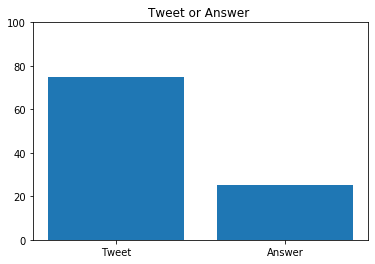

In [0]:
# barplot comparing Tweet to Answer Ratio for Trump
plt.bar(range(2), (trump_number['to'].isna().sum(), 
                   this_many_tweets-trump_number['to'].isna().sum()),
                   tick_label=("Tweet", "Answer"))
plt.title("Tweet or Answer ")
axes = plt.gca()
axes.set_ylim([0,100]);

__How do they compare to one another?__

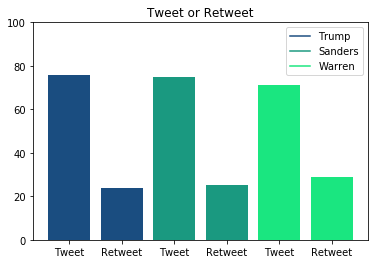

In [0]:
# barplot comparing Tweet to Answer Ratio for all candidates
plt.bar(range(6), (trump_number['to'].isna().sum(), 
                   this_many_tweets-trump_number['to'].isna().sum(),
                   sanders_number['to'].isna().sum(), 
                   this_many_tweets-sanders_number['to'].isna().sum(),
                   warren_number['to'].isna().sum(), 
                   this_many_tweets-warren_number['to'].isna().sum()),
                   tick_label=("Tweet", "Retweet", "Tweet", "Retweet", "Tweet", "Retweet"),
                   color = ((0.1, 0.3, 0.5), (0.1, 0.3, 0.5),
                            (0.1, 0.6, 0.5), (0.1, 0.6, 0.5),
                            (0.1, 0.9, 0.5), (0.1, 0.9, 0.5)))
plt.title("Tweet or Retweet")
axes = plt.gca()
axes.set_ylim([0,100])
# this part below is to get a full legend
axes.plot(0, color=(0.1, 0.3, 0.5))
axes.plot(0, color=(0.1, 0.6, 0.5))
axes.plot(0, color=(0.1, 0.9, 0.5))
axes.legend(['Trump', 'Sanders', 'Warren'], loc=1);

__How many likes does Trump get on average?__

In [0]:
# average number of likes for a Tweet by Trump
print("Trump's tweets have on average", trump_number['favorites'].mean(), "likes.")

Trump's tweets have on average 93288.62 likes.


__How do they compare to one another?__

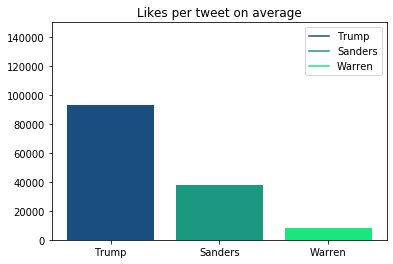

In [0]:
# barplot: average number of likes for a Tweet by each candidate
plt.bar(range(3), (trump_number['favorites'].mean(),
                   sanders_number['favorites'].mean(),
                   warren_number['favorites'].mean()),
                   tick_label=("Trump", "Sanders", "Warren"),
                   color = ((0.1, 0.3, 0.5), (0.1, 0.6, 0.5), (0.1, 0.9, 0.5)))
axes = plt.gca()
axes.set_ylim([0,150000])
axes.plot(0, color=(0.1, 0.3, 0.5))
axes.plot(0, color=(0.1, 0.6, 0.5))
axes.plot(0, color=(0.1, 0.9, 0.5))
plt.title("Likes per tweet on average")
axes.legend(['Trump', 'Sanders', 'Warren'], loc=1);

__Is there a correlation between Likes and Retweets?__

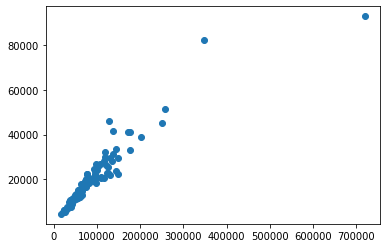

In [0]:
# scatter plot
plt.plot(trump_number['favorites'], trump_number['retweets'], "o");

__Is there a relation between the lenght of a Tweet and the number of Likes?__

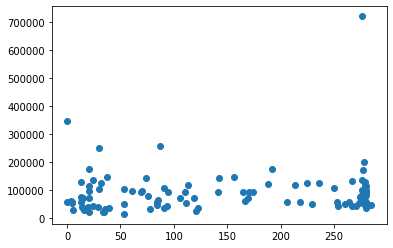

In [0]:
# scatter plot
plt.plot(trump_number['text'].str.len(), trump_number['favorites'], 'o');

__Is there a relation between the Date of Time and the Likes?__

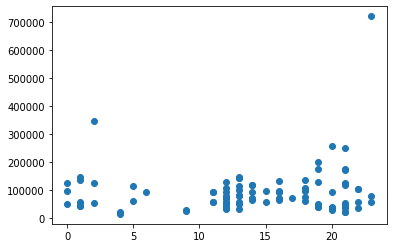

In [0]:
# scatter plot
plt.plot(trump_number['date'].dt.hour, trump_number['favorites'], 'o');

__Much more to potentially do...__

In [0]:
# returning a single Tweet from Trump
trump_number['text'][10]

'Our case against lyin’, cheatin’, liddle’ Adam “Shifty” Schiff, Cryin’ Chuck Schumer, Nervous Nancy Pelosi, their leader, dumb as a rock AOC, & the entire Radical Left, Do Nothing Democrat Party, starts today at 10:00 A.M. on @FoxNews, @OANN or Fake News @CNN or Fake News MSDNC!'

# Web Scraping: ICML

__What library will we be using?__

<center>

![alt text](https://miro.medium.com/max/495/1*AaAIETIq7XNlLrFQW7BtZg.png)

</center>

__Import packages:__

In [0]:
# packages for Web Scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup

# packages for Data Analysis
import pandas as pd
import numpy as np
import itertools

# tracks the run time
import time

## urlopen

__Pass the link of the website:__

In [0]:
# the link to scrape
icml_url = "https://dblp1.uni-trier.de/db/conf/icml/ml1988.html"

In [0]:
print("We want to scrape:", icml_url)

We want to scrape: https://dblp1.uni-trier.de/db/conf/icml/ml1988.html


In [0]:
# opens the URL 
response = urlopen(icml_url) 

In [0]:
response

In [0]:
# reads the response 
page_source = response.read()

In [0]:
type(page_source)

bytes

In [0]:
# get the HTML site
soup = BeautifulSoup(page_source, 'html.parser') 

In [0]:
# prints the HTML site in a structured way
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head><meta charset="utf-8"/><title>dblp: 5. ML 1988</title><link href="https://dblp.org" rel="home"/><link href="https://dblp1.uni-trier.de/img/dblp.icon.192x192.png" rel="apple-touch-icon" sizes="192x192" type="image/png"/><link href="https://dblp1.uni-trier.de/img/dblp.icon.192x192.png" rel="icon" sizes="192x192" type="image/png"/><link href="https://dblp1.uni-trier.de/img/dblp.icon.152x152.png" rel="icon" sizes="152x152" type="image/png"/><link href="https://dblp1.uni-trier.de/img/dblp.icon.120x120.png" rel="icon" sizes="120x120" type="image/png"/><link href="https://dblp1.uni-trier.de/img/favicon.ico" id="favicon" rel="shortcut icon" sizes="16x16 24x24 32x32 64x64" type="image/x-icon"><link href="https://dblp1.uni-trier.de/css/dblp-2019-10-11.css" rel="stylesheet" type="text/css"><!--[if lt IE 9]><link rel="stylesheet" href="https://dblp1.uni-trier.de/css/dblp-ie8-fix.css" /><script src="https://dblp1.uni-trier.de/js/

## Beautifulsoup

__Find the authors and titles:__

In [0]:
# findAll returns ALL corresponding tags 
soup.findAll("cite", {"class": "data"})

[<cite class="data" itemprop="headline"><span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/l/Laird:John_E=" itemprop="url"><span itemprop="name">John E. Laird</span></a></span>:<br/> <span class="title" itemprop="name">Machine Learning, Proceedings of the Fifth International Conference on Machine Learning, Ann Arbor, Michigan, USA, June 12-14, 1988.</span> <span itemprop="publisher">Morgan Kaufmann</span> <span itemprop="datePublished">1988</span>, ISBN <span itemprop="isbn">0-934613-64-8</span></cite>,
 <cite class="data" itemprop="headline"><span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/k/Kerber:Randy" itemprop="url"><span itemprop="name">Randy Kerber</span></a></span>:<br/> <span class="title" itemprop="name">Using a Generalization Hierarchy to Learn from Examples.</span> <a href="https://dblp1.uni-trier.de/db/conf/icml/ml1988.html#Kerber88"><span i

__One of the authors and titles:__

In [0]:
# this returns a single HTML tag (on the 8th index)
# .find would return the first
soup.findAll("cite", {"class": "data"})[8]

<cite class="data" itemprop="headline"><span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/c/Cheeseman:Peter_C=" itemprop="url"><span itemprop="name">Peter C. Cheeseman</span></a></span>, <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/k/Kelly:James" itemprop="url"><span itemprop="name">James Kelly</span></a></span>, <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/s/Self:Matthew" itemprop="url"><span itemprop="name">Matthew Self</span></a></span>, <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/s/Stutz:John_C=" itemprop="url"><span itemprop="name">John C. Stutz</span></a></span>, <span itemprop="author" itemscope="" itemtype="http://schema.org/Person"><a href="https://dblp1.uni-trier.de/pers/hd/t/Taylor:Will" itemprop=

__Filter for the authors and title:__

In [0]:
# findAll can be combined with findAll 
soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "name"})

[<span itemprop="name">Peter C. Cheeseman</span>,
 <span itemprop="name">James Kelly</span>,
 <span itemprop="name">Matthew Self</span>,
 <span itemprop="name">John C. Stutz</span>,
 <span itemprop="name">Will Taylor</span>,
 <span itemprop="name">Don Freeman</span>,
 <span class="title" itemprop="name">AutoClass: A Bayesian Classification System.</span>,
 <span itemprop="name">ML</span>]

__Return only the authors:__

In [0]:
# only returns the authors by skipping the last two items
soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "name"})[:-2]

[<span itemprop="name">Peter C. Cheeseman</span>,
 <span itemprop="name">James Kelly</span>,
 <span itemprop="name">Matthew Self</span>,
 <span itemprop="name">John C. Stutz</span>,
 <span itemprop="name">Will Taylor</span>,
 <span itemprop="name">Don Freeman</span>]

__Return the authors as a text:__

In [0]:
# list comprehension to filter the HTML tags out
[x.text for x in soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "name"})[:-2]]

['Peter C. Cheeseman',
 'James Kelly',
 'Matthew Self',
 'John C. Stutz',
 'Will Taylor',
 'Don Freeman']

__Return only the title:__

In [0]:
# only returns the second to last item (the title)
soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "name"})[-2:-1]

[<span class="title" itemprop="name">AutoClass: A Bayesian Classification System.</span>]

__Return the title as a text:__

In [0]:
# .text returns text-only (no tags) 
soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "name"})[-2:-1][0].text

'AutoClass: A Bayesian Classification System.'

__Get the page numbers:__

In [0]:
# returns the page numbers using .findAll and the corresponding HTML tag
soup.findAll("cite", {"class": "data"})[8].findAll("span", {"itemprop": "pagination"})[0].text

'54-64'

## Wrapping it up in a function

In [0]:
# this function wraps up the above code from the 2nd example
def scrape_icml(url):
    response = urlopen(icml_url)
    page_source = response.read()
    soup = BeautifulSoup(page_source, 'html.parser')
    authors, title, pages = ([] for i in range(3)) # initializes the list to append them
    length = len(soup.findAll("cite", {"class": "data"})) # number of all corresponding HTML tags
    
    for i in range(1, length):
        authors.append([x.text for x in soup.findAll("cite", {"class": "data"})[i].findAll("span", {"itemprop": "name"})[:-2]]) # here are the author's names located
        title.append(soup.findAll("cite", {"class": "data"})[i].findAll("span", {"itemprop": "name"})[-2:-1][0].text) # here's the title names located
        pages.append(soup.findAll("cite", {"class": "data"})[i].findAll("span", {"itemprop": "pagination"})[0].text) # here are the page numbers located
        
    df = pd.DataFrame({"Authors": authors, 
                             "Title": title, 
                             "Pages": pages}) # this creates a pd.DF
    df['Authors'] = [', '.join(map(str, k)) for k in df['Authors']] 
    df['No. Authors'] = [x.count(",")+1 for x in df['Authors']] # counts the number of authors
    
    return(df) # returns a pd.DF

In [0]:
icml_url = "https://dblp1.uni-trier.de/db/conf/icml/ml1988.html" # the link to scrape
df = scrape_icml(icml_url) # call the function scrape_icml

In [0]:
# the website is scraped! Well Done!!
df.head() 

,Authors,Title,Pages,No. Authors
0,Randy Kerber,Using a Generalization Hierarchy to Learn from...,1-7,1
1,Hans Tallis,Tuning Rule-Based Systems to Their Environments.,8-14,1
2,"Brent J. Krawchuk, Ian H. Witten",On Asking the Right Questions.,15-21,2
3,"Douglas H. Fisher, Jeffrey C. Schlimmer",Concept Simplification and Prediction Accuracy.,22-28,2
4,Jakub Segen,Learning Graph Models of Shape.,29-35,1
